**project on AR_model_to_predict_house_sales**

In [ ]:
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('raw_sales.csv')
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [ ]:
df.rename(columns={'datesold':'datesale'}, inplace=True)
df.head()

,datesale,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [ ]:
df['datesale'] = pd.to_datetime(df['datesale'])
df.head(3)

,datesale,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3


In [ ]:
df.isnull().sum()

datesale        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [ ]:
df.set_index('datesale', inplace=True)

In [ ]:
df.head(30)

,postcode,price,propertyType,bedrooms
datesale,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3
2007-04-04,2905,465000,house,4
2007-04-24,2607,399000,house,3
2007-04-30,2606,1530000,house,4
2007-05-24,2902,359000,house,3


In [ ]:
df1 = df.resample('M').mean()
df1.head(20)

,postcode,price,bedrooms
datesale,,,
2007-02-28,2756.500000,407500.000000,3.500000
2007-03-31,2905.333333,339333.333333,3.333333
2007-04-30,2706.000000,798000.000000,3.666667
2007-05-31,2904.000000,339500.000000,3.000000
2007-06-30,2757.500000,520333.333333,3.333333
2007-07-31,2668.684211,592078.947368,3.263158
2007-08-31,2775.869565,505608.695652,3.391304
2007-09-30,2681.950000,556875.000000,3.300000
2007-10-31,2743.500000,498600.000000,3.300000


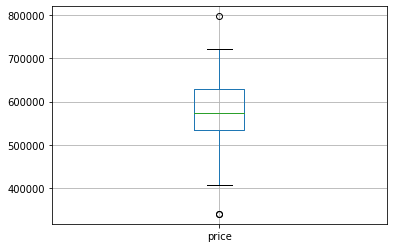

In [ ]:
df1.loc[:,['price']].boxplot()

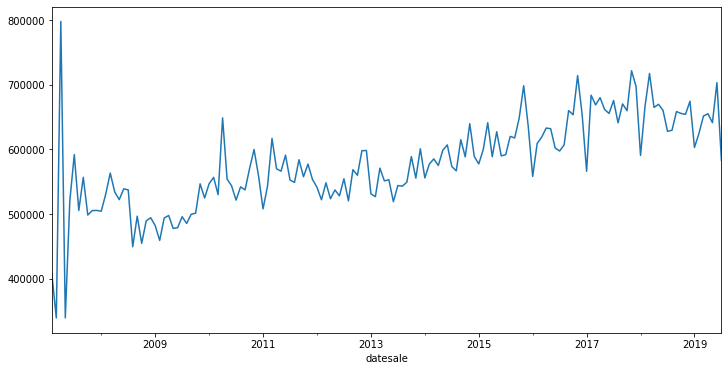

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
df1['price'].plot()
plt.show()

In [ ]:
for n in df1['price']:
    if n > df1['price'].mean() + np.std(df1['price'])*2 or n < df1['price'].mean() - np.std(df1['price'])*2:
        df1[df1 == n] = df1['price'].mean()

In [ ]:
for n in df1['price']:
    if n > df1['price'].mean() + np.std(df1['price'])*2 or n < df1['price'].mean() - np.std(df1['price'])*2:
        print(n)

698680.5721393034


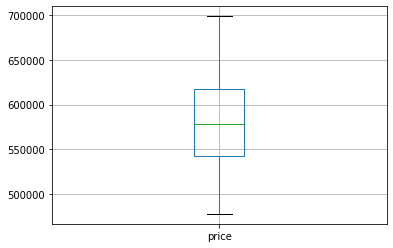

In [ ]:
df1.loc[:,['price']].boxplot()

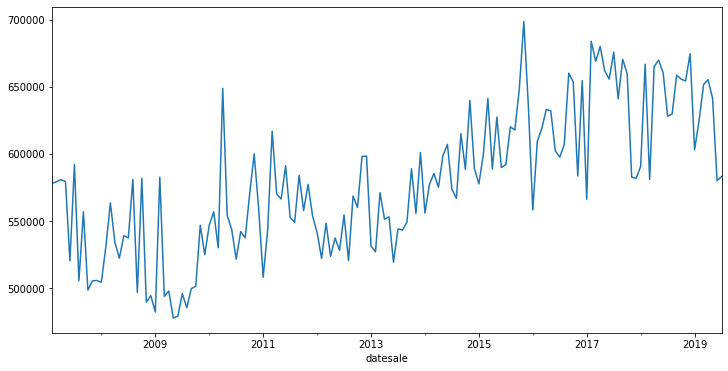

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
df1['price'].plot()
plt.show()

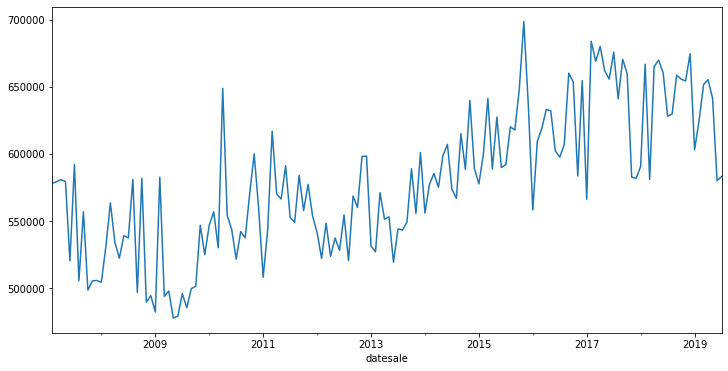

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
df1['price'].plot()
plt.show()

In [ ]:
df1 = df1.diff()
df1.dropna(inplace=True)
print("value:", adfuller(df1['price'])[0],
     "p-value:", adfuller(df1['price'])[1],
     "conf:", adfuller(df1['price'])[4])

value: -6.122559234641568 p-value: 8.783799060237963e-08 conf: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


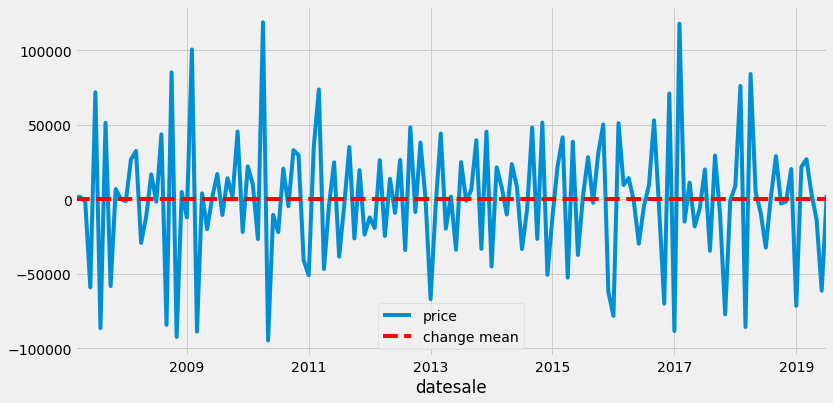

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')
df1['price'].plot()
plt.axhline(y=df1['price'].mean(), color='red', ls='--', label='change mean')
plt.legend()
plt.show()

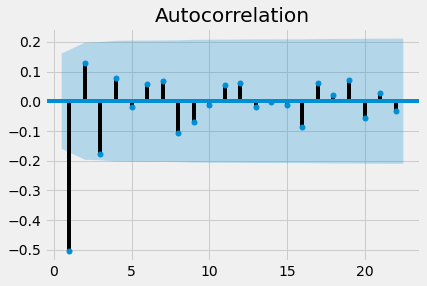

In [ ]:
plot_acf(df1['price'], zero=False)
plt.show()

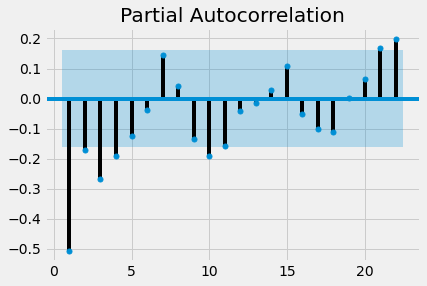

In [ ]:
plot_pacf(df1['price'], zero=False)
plt.show()

In [ ]:
modelo = SARIMAX(df1['price'], order=(0,0,1))
res = modelo.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                  price   No. Observations:                  149
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1764.134
Date:                Sun, 28 Nov 2021   AIC                           3532.268
Time:                        08:30:54   BIC                           3538.276
Sample:                    03-31-2007   HQIC                          3534.709
                         - 07-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7474      0.060    -12.382      0.000      -0.866      -0.629
sigma2      1.215e+09   6.48e-13   1.88e+21      0.000    1.21e+09    1.21e+09
Ljung-Box (Q):                       61.76   Jarque-

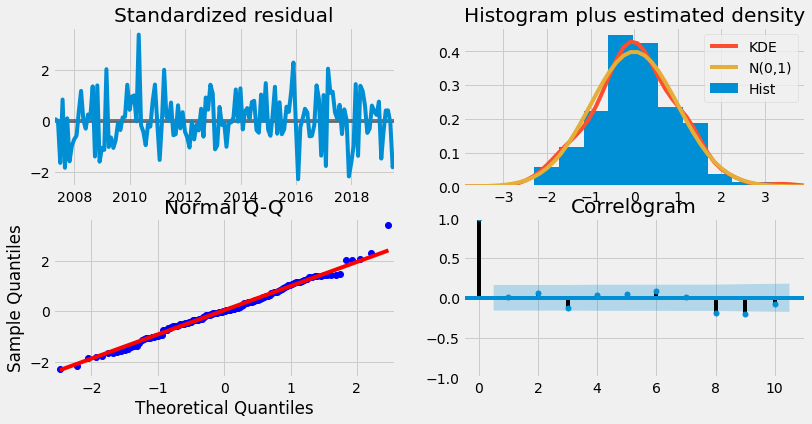

In [ ]:
res.plot_diagnostics(figsize=(12,6))
plt.show()

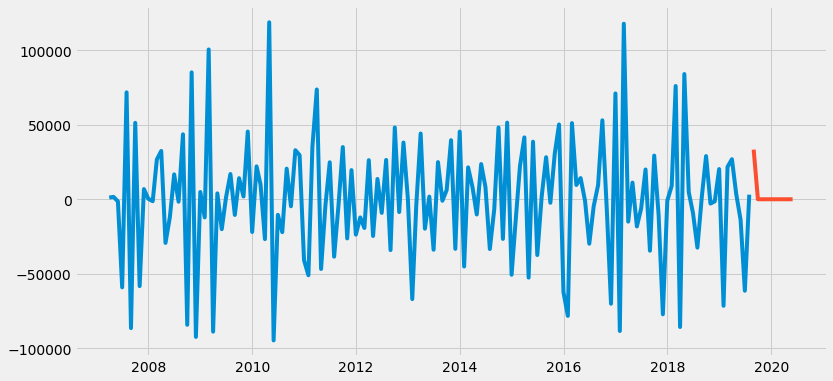

In [ ]:
diff_forecast = res.get_forecast(steps=10)
forecast_mean = diff_forecast.predicted_mean

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(df1['price'])
plt.plot(forecast_mean)
plt.show()